In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mglearn

from IPython.display import display

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [73]:
pd.options.display.max_rows = 15

In [74]:
data = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')

In [75]:
encoded = data.copy()

In [76]:
encoded['Male'] = (encoded.Sex == 'male').astype(float)

In [77]:
encoded['Female'] = (encoded.Sex == 'female').astype(float)

In [78]:
encoded[encoded.Survived == 1].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Male,Female
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408,0.318713,0.681287
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998,0.466660,0.466660
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000,0.000000,0.000000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000,0.000000,1.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000,1.000000,1.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,1.000000,1.000000


In [79]:
data.isnull().sum().sort_values()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Age         177
Cabin       687
dtype: int64

In [80]:
d = data.copy()

In [81]:
d['Age'] = data.Age.fillna(data.Age.mean())

In [82]:
d.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
X = d[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

In [84]:
X

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.000000,1,0,7.2500
2,1,38.000000,1,0,71.2833
3,3,26.000000,0,0,7.9250
4,1,35.000000,1,0,53.1000
5,3,35.000000,0,0,8.0500
6,3,29.699118,0,0,8.4583
7,1,54.000000,0,0,51.8625
...,...,...,...,...,...
885,3,25.000000,0,0,7.0500


In [85]:
y = d['Survived']

In [86]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
      ..
885    0
886    0
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

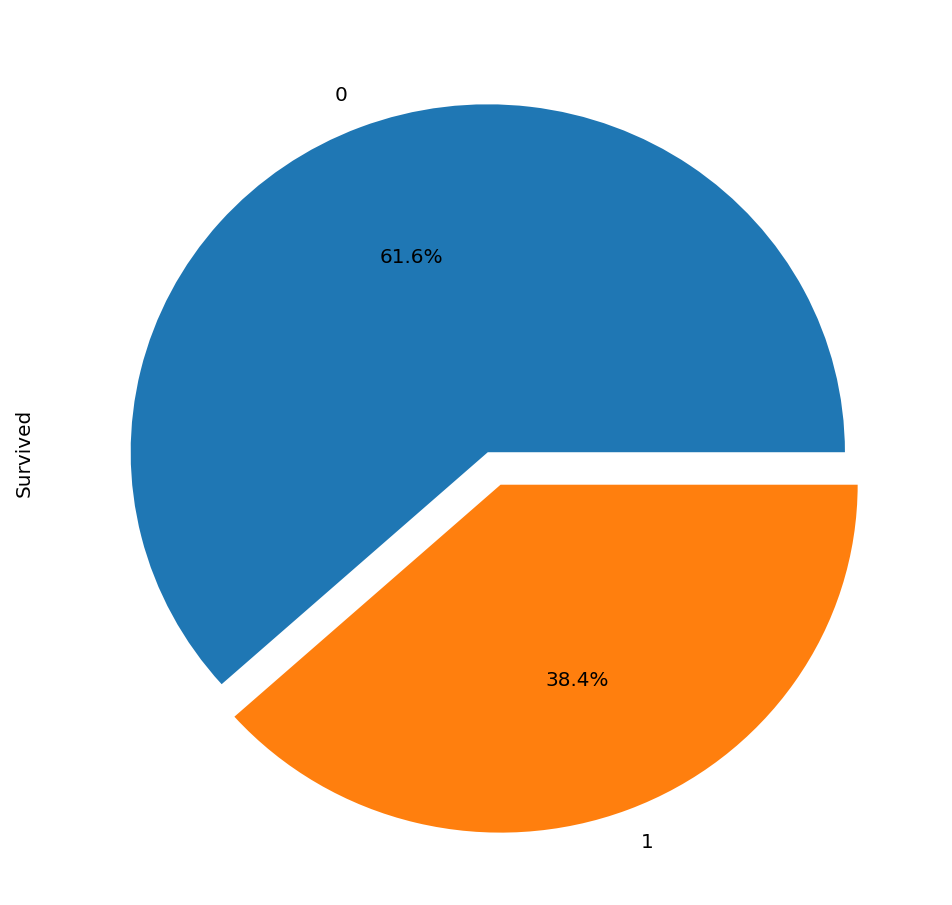

In [87]:
y.value_counts().plot.pie(explode=[0, 0.1], figsize=(8, 8), autopct='%1.1f%%');

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [90]:
y_train.mean(), y_test.mean(), y_test.median()

(0.38323353293413176, 0.38565022421524664, 0.0)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression().fit(x_train, y_train)

In [93]:
model.score(x_train, y_train)

0.70808383233532934

In [94]:
model.score(x_test, y_test)

0.69506726457399104

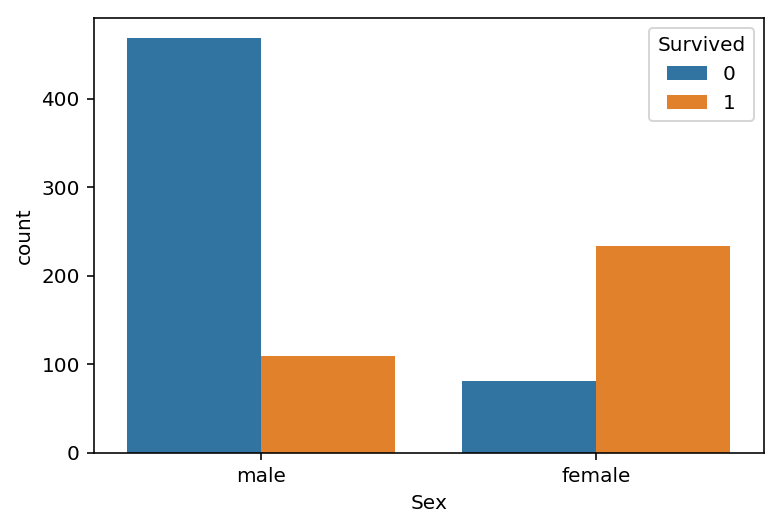

In [95]:
sns.countplot('Sex', hue='Survived', data=data);

In [96]:
ages = data[['Age', 'Survived']]

In [97]:
ages.Age.isnull()

PassengerId
1      False
2      False
3      False
4      False
5      False
6       True
7      False
       ...  
885    False
886    False
887    False
888    False
889     True
890    False
891    False
Name: Age, Length: 891, dtype: bool

In [98]:
ages = ages[~ages.Age.isnull()]

In [99]:
ages

,Age,Survived
PassengerId,,
1,22.0,0
2,38.0,1
3,26.0,1
4,35.0,1
5,35.0,0
7,54.0,0
8,2.0,0
...,...,...
884,28.0,0


In [100]:
ages.Age = ages.Age.apply(lambda x: (x//5) * 5)

In [101]:
age_groups = ages.groupby('Age')

In [102]:
age_groups.mean()

,Survived
Age,
0.0,0.675000
5.0,0.500000
10.0,0.437500
15.0,0.395349
20.0,0.342105
25.0,0.358491
30.0,0.421053
...,...
45.0,0.390244


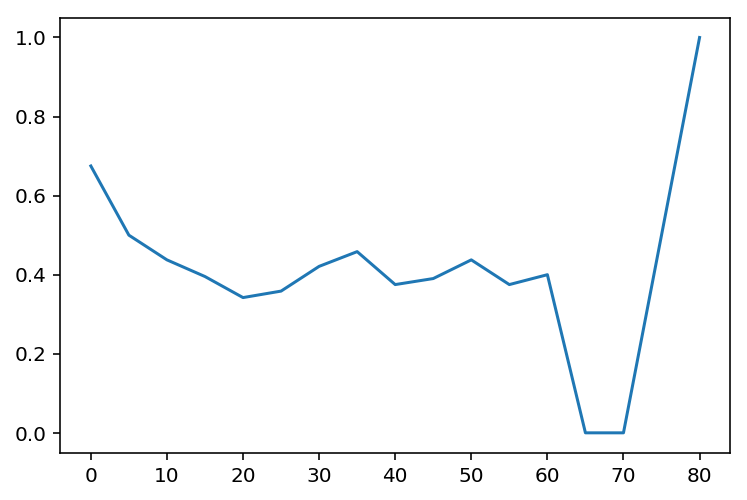

In [103]:
plt.plot(age_groups.mean());

In [104]:
type(data.Age >= 60)

pandas.core.series.Series

In [105]:
type(data)

pandas.core.frame.DataFrame

In [106]:
data[data.Age >= 70][['Survived', 'Name', 'Age']].sort_values(by='Age', ascending=False)

,Survived,Name,Age
PassengerId,,,
631,1,"Barkworth, Mr. Algernon Henry Wilson",80.0
852,0,"Svensson, Mr. Johan",74.0
97,0,"Goldschmidt, Mr. George B",71.0
494,0,"Artagaveytia, Mr. Ramon",71.0
117,0,"Connors, Mr. Patrick",70.5
673,0,"Mitchell, Mr. Henry Michael",70.0
746,0,"Crosby, Capt. Edward Gifford",70.0


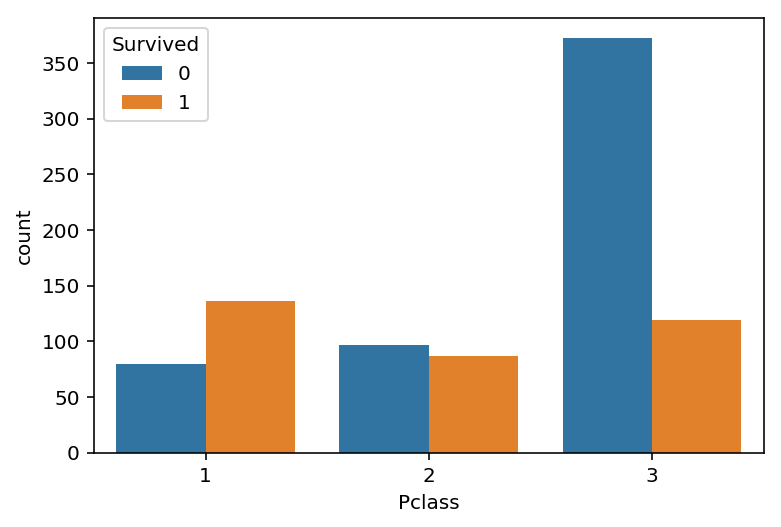

In [107]:
sns.countplot('Pclass', hue='Survived', data=data);

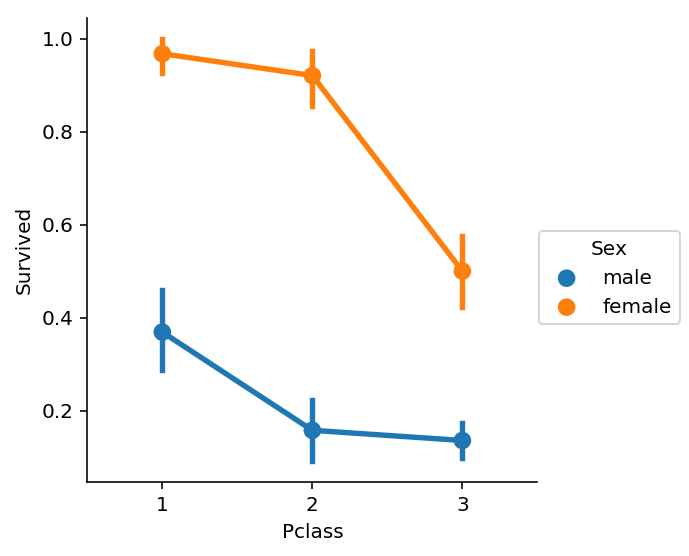

In [108]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data);

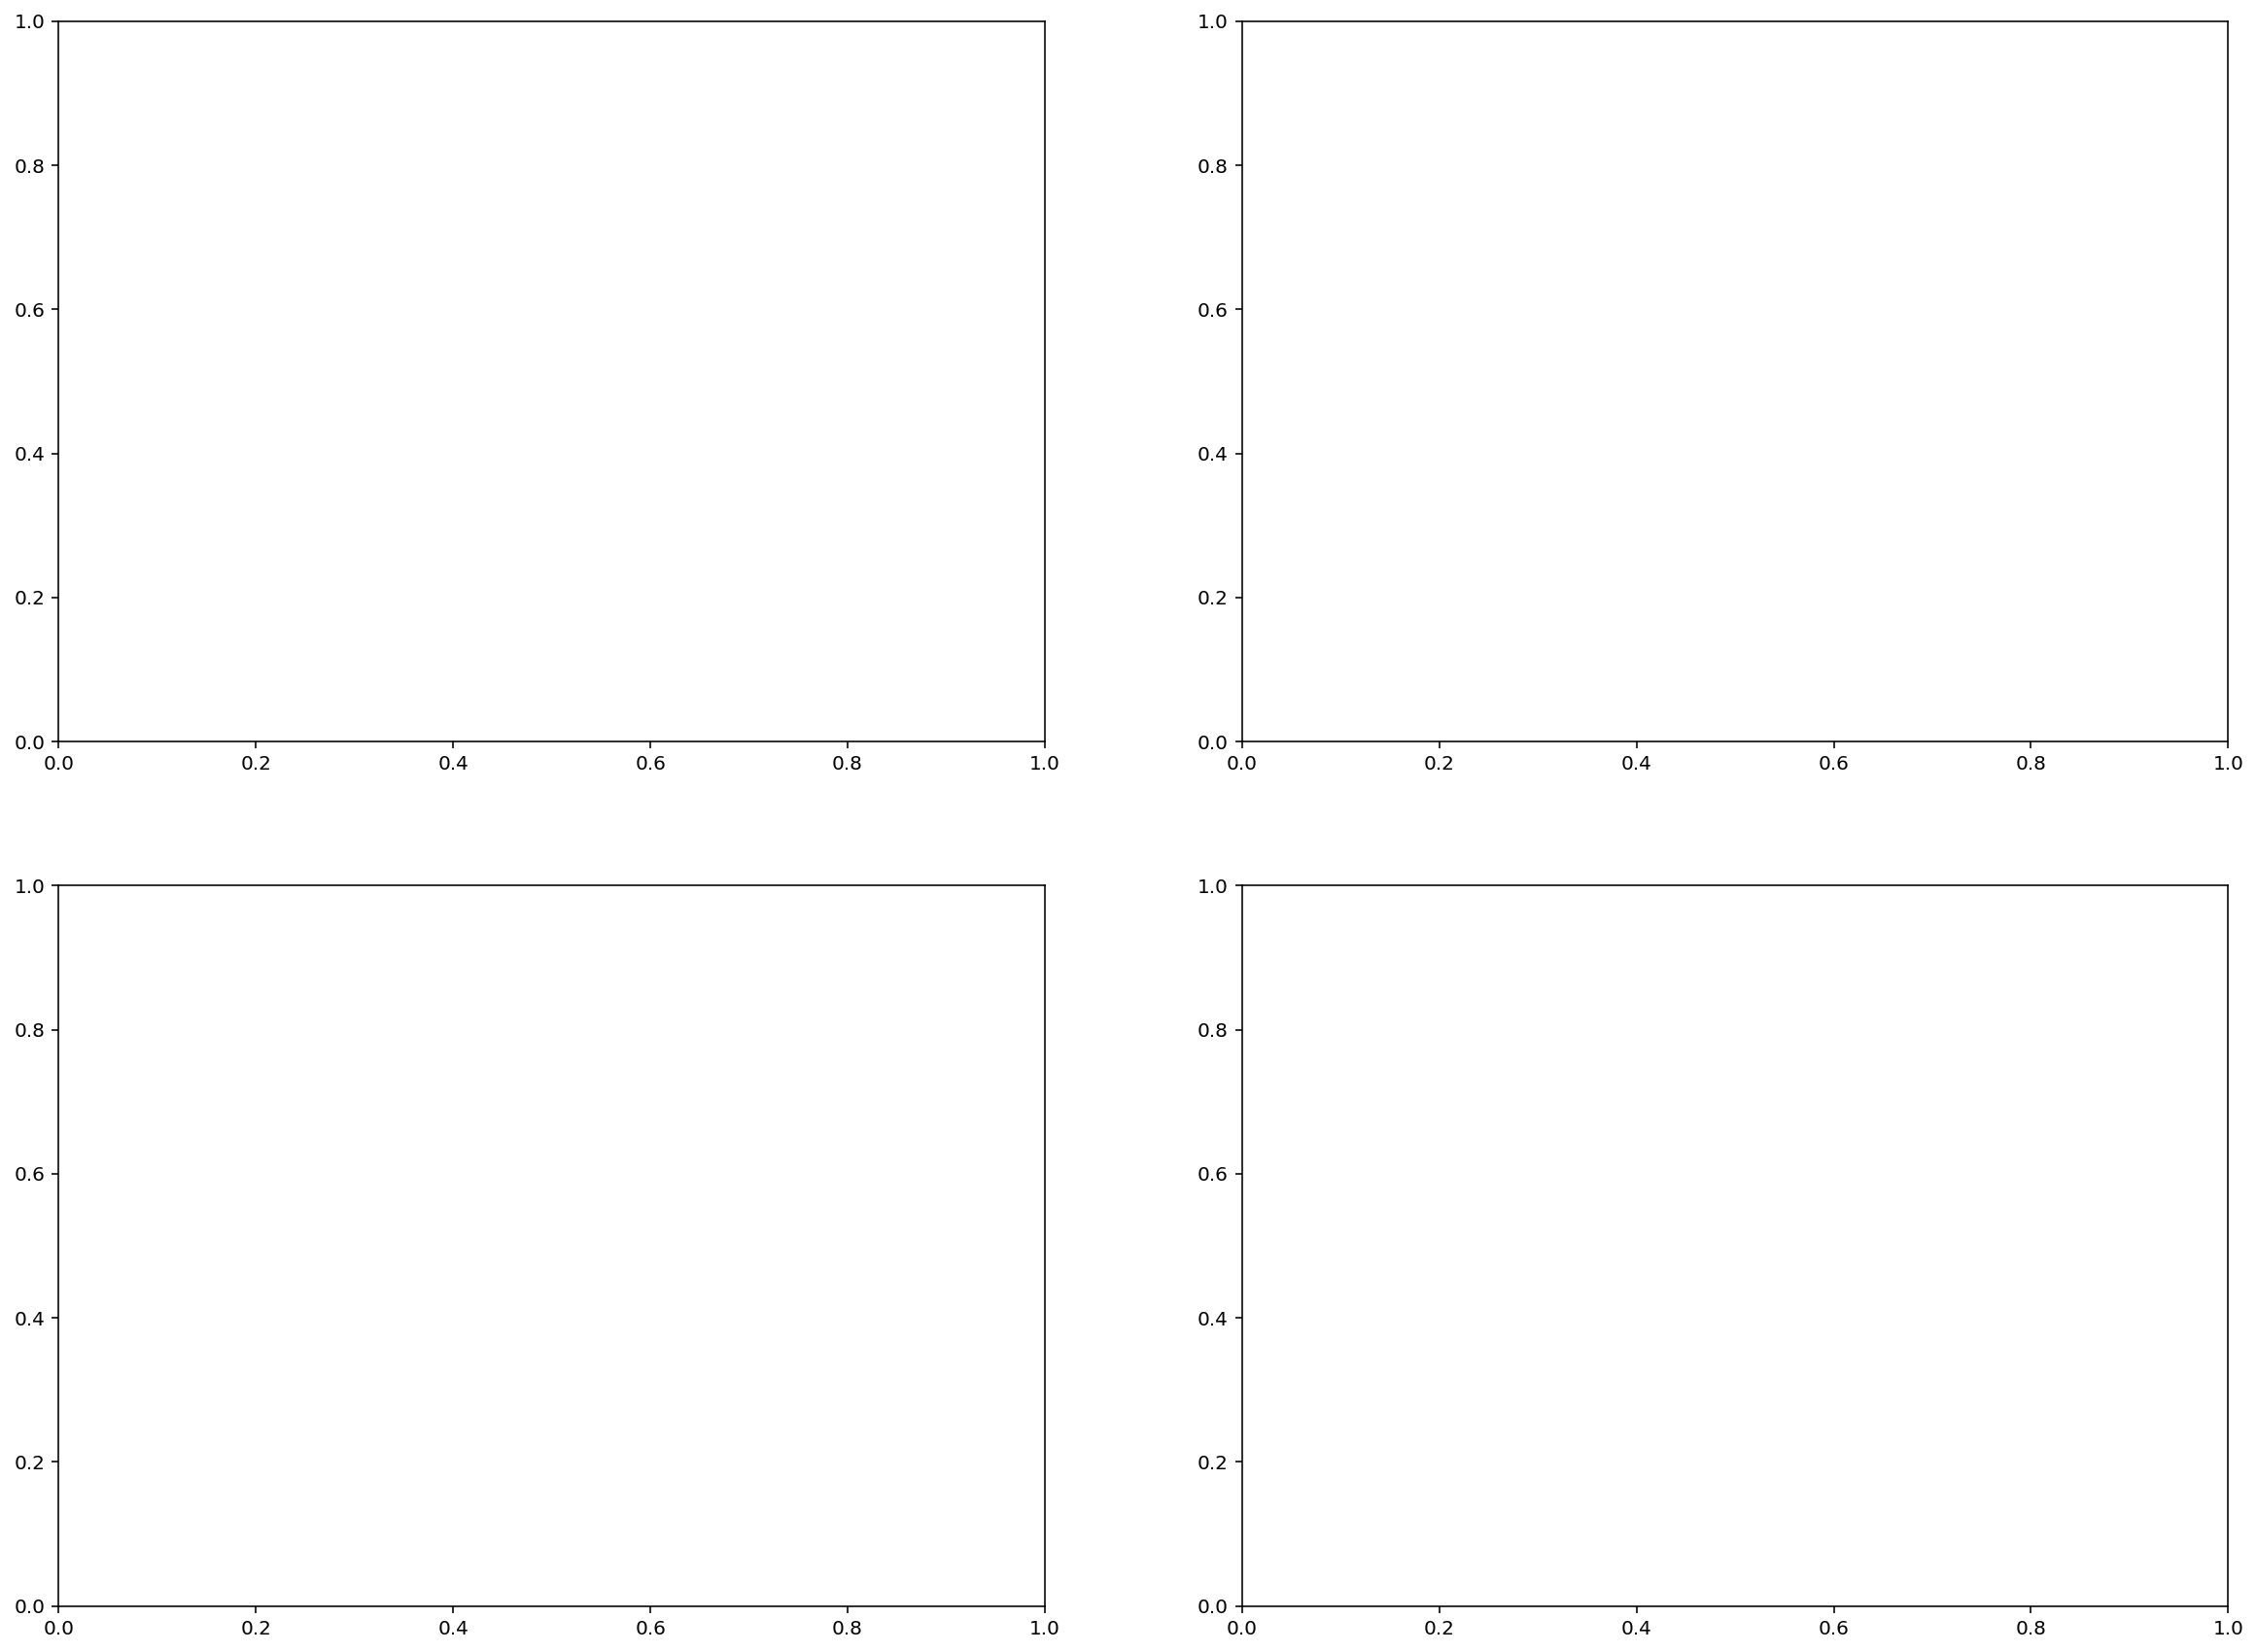

In [109]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

In [110]:
sns.countplot('Embarked', data=data, ax=ax[0, 0])

In [111]:
ax[0, 0].set_title('No. Of Passengers Boarded')

Text(0.5,1,'No. Of Passengers Boarded')

In [112]:
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

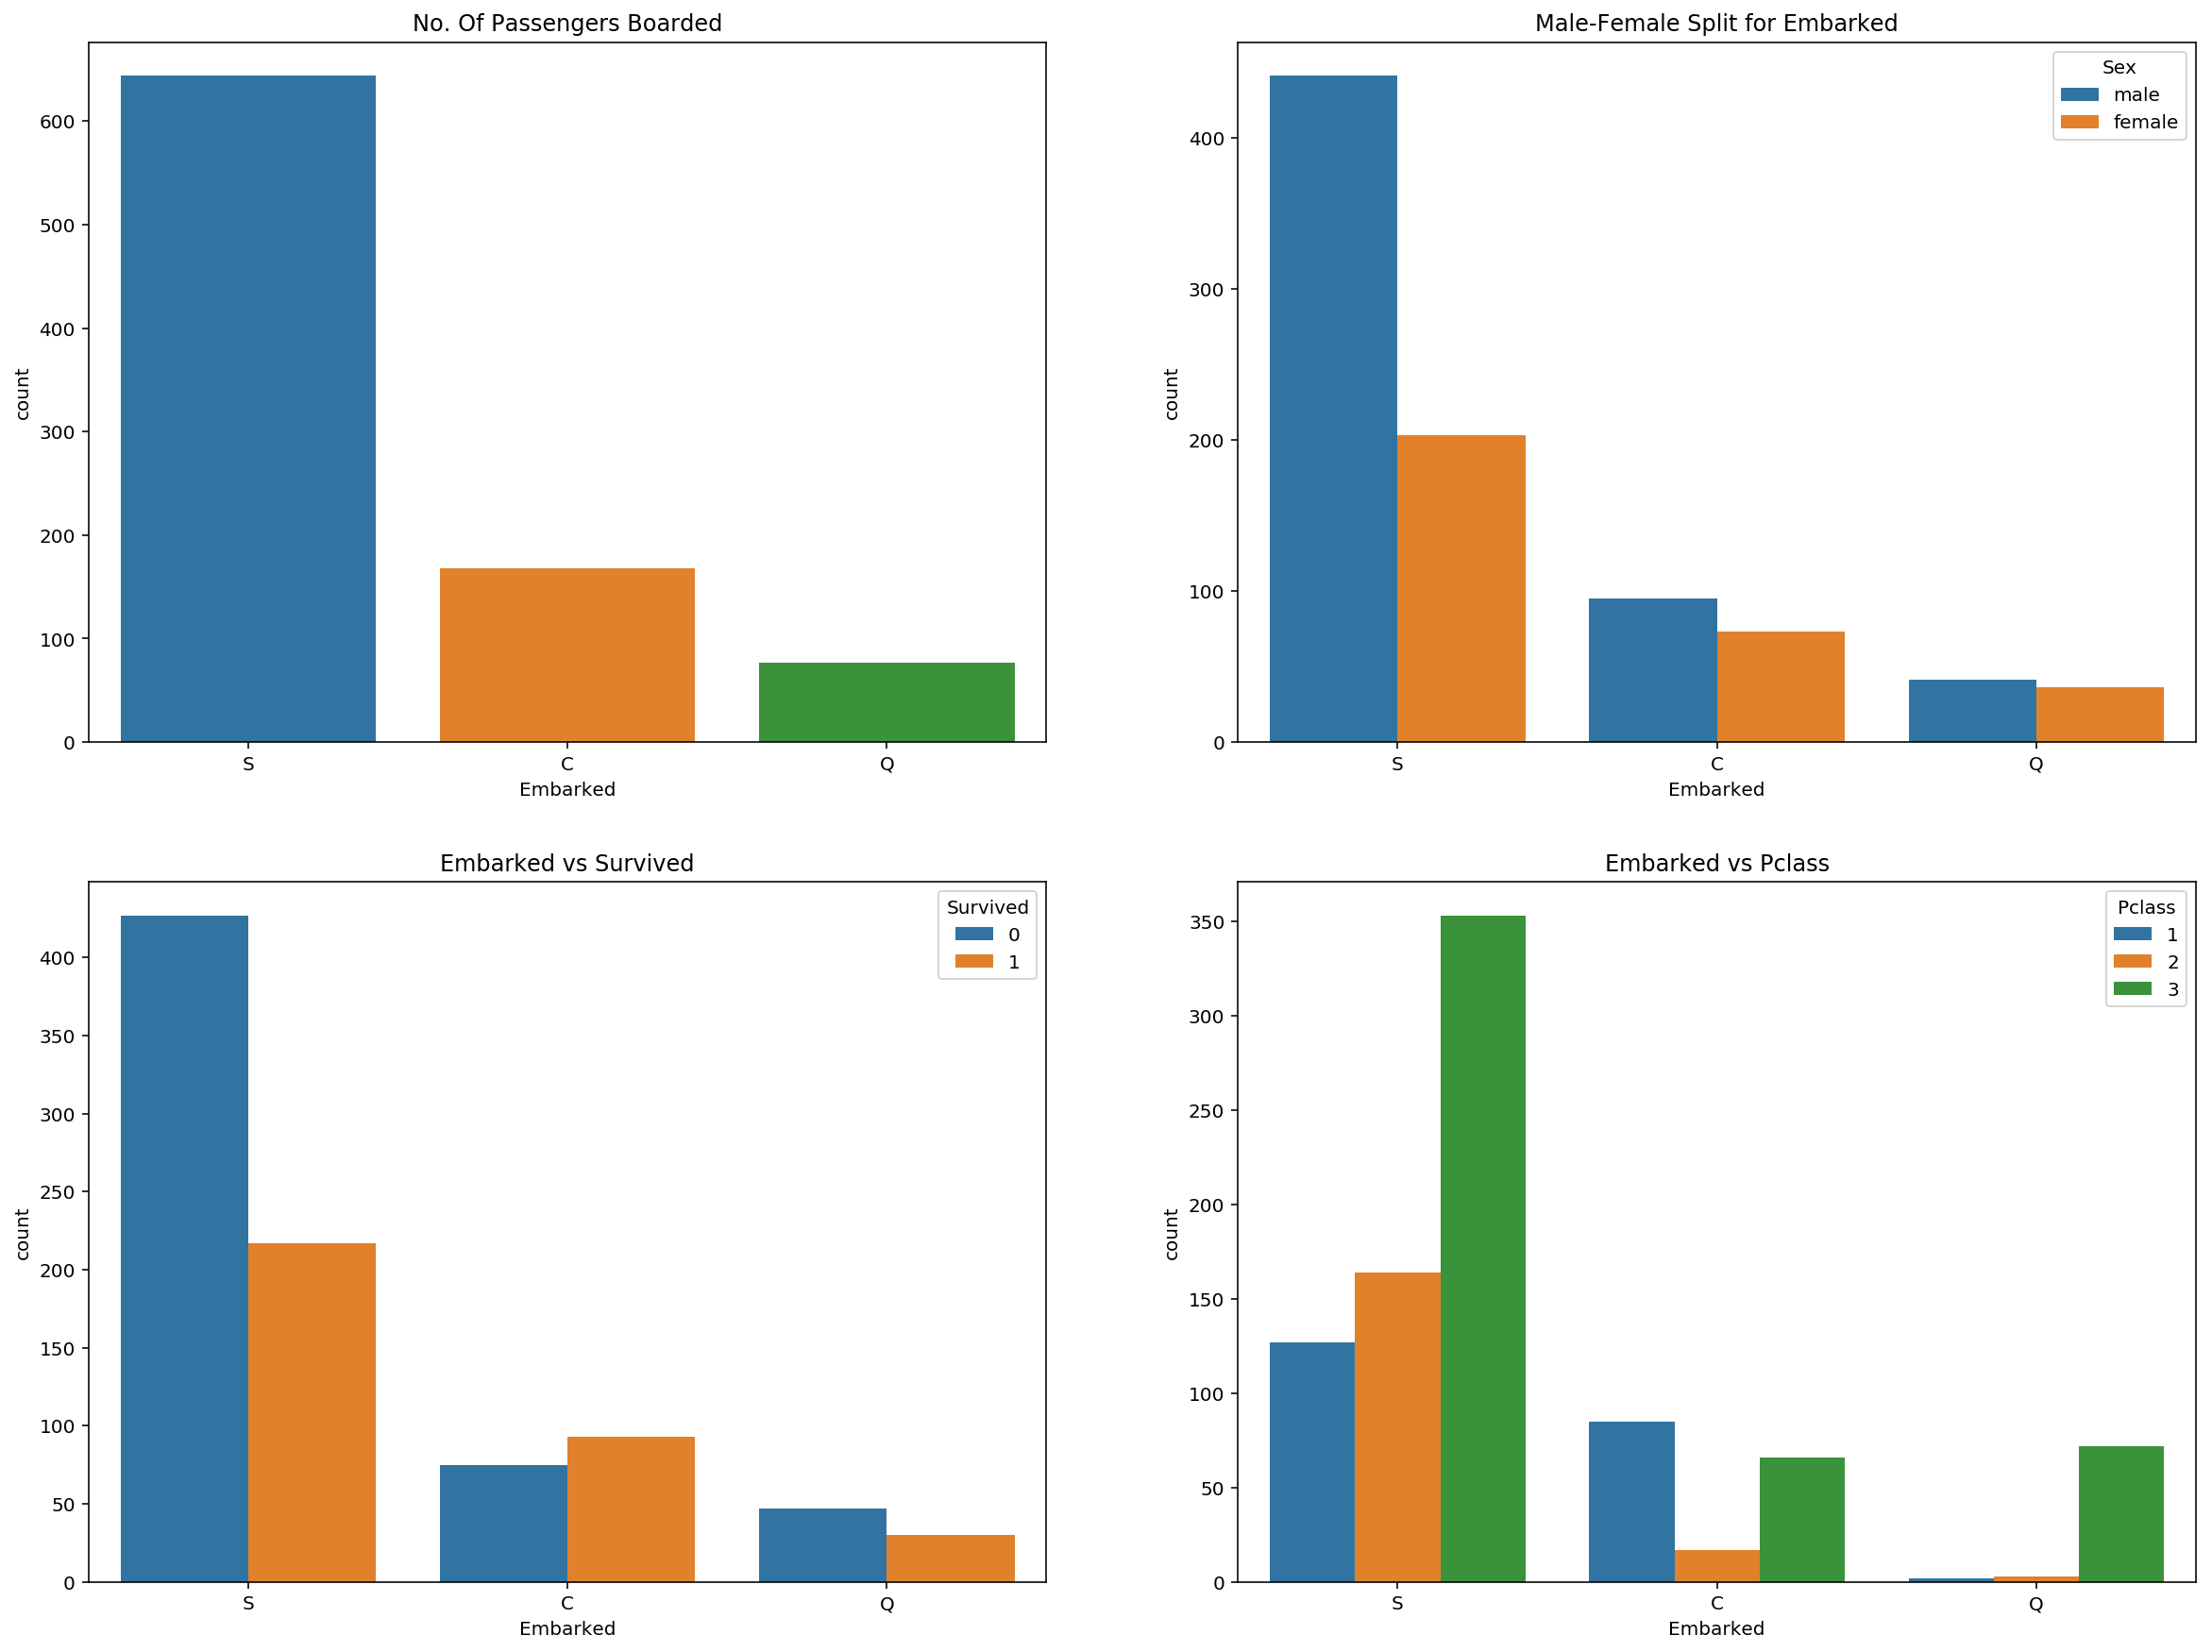

In [113]:
f

In [114]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [115]:
pd.options.display.max_rows = 20
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Mme           1
Sir           1
Jonkheer      1
Don           1
Lady          1
Countess      1
Capt          1
Name: Title, dtype: int64

In [116]:
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'

In [117]:
data[data.Title == 'Mlle']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,


In [118]:
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

In [119]:
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')
data.Title.value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

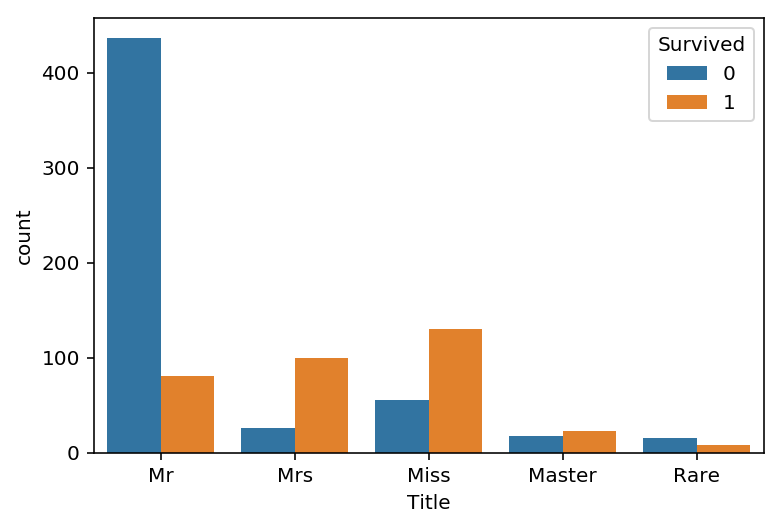

In [120]:
sns.countplot('Title', hue='Survived', data=data);

In [121]:
data.groupby('Title').Age.mean()

Title
Master     4.574167
Miss      21.845638
Mr        32.368090
Mrs       35.788991
Rare      45.545455
Name: Age, dtype: float64

In [122]:
title_group = data.groupby('Title')

In [123]:
title_group.size()

Title
Master     40
Miss      185
Mr        517
Mrs       126
Rare       23
dtype: int64

In [124]:
original = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')

In [125]:
data = original.copy()

In [126]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)
data.loc[data.Title == 'Mlle', 'Title'] = 'Miss'
data.loc[data.Title == 'Mme', 'Title']  = 'Mrs'
data.loc[data.Title == 'Ms', 'Title']   = 'Miss'

rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Don', 'Jonkheer', 'Capt', 'Lady', 'Sir']
data.Title = data.Title.replace(rare_titles, 'Rare')

In [127]:
age_by_title = data.groupby('Title').Age.mean()
data.loc[data.Age.isnull() & (data.Title == 'Mr'), 'Age'] = age_by_title['Mr']
data.loc[data.Age.isnull() & (data.Title == 'Mrs'), 'Age'] = age_by_title['Mrs']
data.loc[data.Age.isnull() & (data.Title == 'Miss'), 'Age'] = age_by_title['Miss']
data.loc[data.Age.isnull() & (data.Title == 'Master'), 'Age'] = age_by_title['Master']
data.loc[data.Age.isnull() & (data.Title == 'Rare'), 'Age'] = age_by_title['Rare']

In [129]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [130]:
data.Embarked = data.Embarked.fillna('S')
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
Title         0
dtype: int64

In [131]:
data = data.drop('Cabin', axis=1)

In [132]:
data['FamilySize'] = data.Parch + data.SibSp + 1
data = data.drop(['Parch', 'SibSp'], axis=1)

In [133]:
data

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,S,Mr,1
6,0,3,"Moran, Mr. James",male,32.368090,330877,8.4583,Q,Mr,1
7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,S,Mr,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,S,Master,5
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,S,Mrs,3


In [134]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [135]:
data.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.759451,32.204208,1.904602
std,0.486592,0.836071,13.278693,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,21.845638,7.910400,1.000000
50%,0.000000,3.000000,30.000000,14.454200,1.000000
75%,1.000000,3.000000,35.788991,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [136]:
transformed = data.copy()

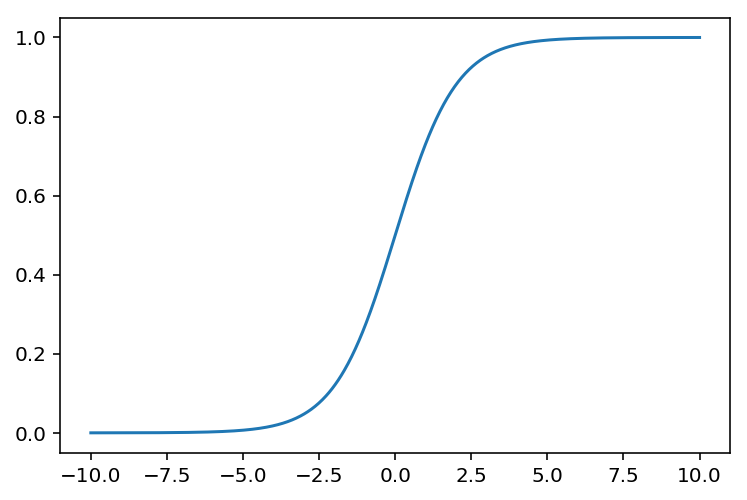

In [137]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

interval = np.linspace(-10, 10, num=1000)
plt.plot(interval, sigmoid(interval));

In [138]:
transformed.head(6)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00000,A/5 21171,7.2500,S,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,PC 17599,71.2833,C,Mrs,2
3,1,3,"Heikkinen, Miss. Laina",female,26.00000,STON/O2. 3101282,7.9250,S,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,113803,53.1000,S,Mrs,2
5,0,3,"Allen, Mr. William Henry",male,35.00000,373450,8.0500,S,Mr,1
6,0,3,"Moran, Mr. James",male,32.36809,330877,8.4583,Q,Mr,1


In [139]:
data = transformed.copy()
data['IsMale']    = (data.Sex == 'male').astype(float)
data['IsFemale']  = (data.Sex == 'female').astype(float)
data['IsMr']      = (data.Title == 'Mr').astype(float)
data['IsMrs']     = (data.Title == 'Mrs').astype(float)
data['IsMiss']    = (data.Title == 'Miss').astype(float)
data['IsMaster']  = (data.Title == 'Master').astype(float)
data['IsRare']    = (data.Title == 'Rare').astype(float)
data['EmbarkedC'] = (data.Embarked == 'C').astype(float)
data['EmbarkedQ'] = (data.Embarked == 'Q').astype(float)
data['EmbarkedS'] = (data.Embarked == 'S').astype(float)

data = data.drop(['Sex', 'Embarked', 'Title'], axis=1)

In [140]:
data.head(10)

,Survived,Pclass,Name,Age,Ticket,Fare,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.00000,A/5 21171,7.2500,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.00000,PC 17599,71.2833,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,"Heikkinen, Miss. Laina",26.00000,STON/O2. 3101282,7.9250,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,113803,53.1000,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,"Allen, Mr. William Henry",35.00000,373450,8.0500,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,3,"Moran, Mr. James",32.36809,330877,8.4583,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0,1,"McCarthy, Mr. Timothy J",54.00000,17463,51.8625,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0,3,"Palsson, Master. Gosta Leonard",2.00000,349909,21.0750,5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.00000,347742,11.1333,3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
data = data.drop(['Name', 'Ticket', 'Fare'], axis=1)
data.head(5)

,Survived,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,,
1,0,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [142]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [143]:
X.head()

,Pclass,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS
PassengerId,,,,,,,,,,,,,
1,3,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [144]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.80269058296


In [145]:
def logistic_regression_features(X, model):
    plt.figure(figsize=(12,8))
    barplot = sns.barplot(x=X.columns, y=model.coef_[0], orient='vertical')
    plt.setp(barplot.get_xticklabels(), rotation=90)
    plt.grid(True)

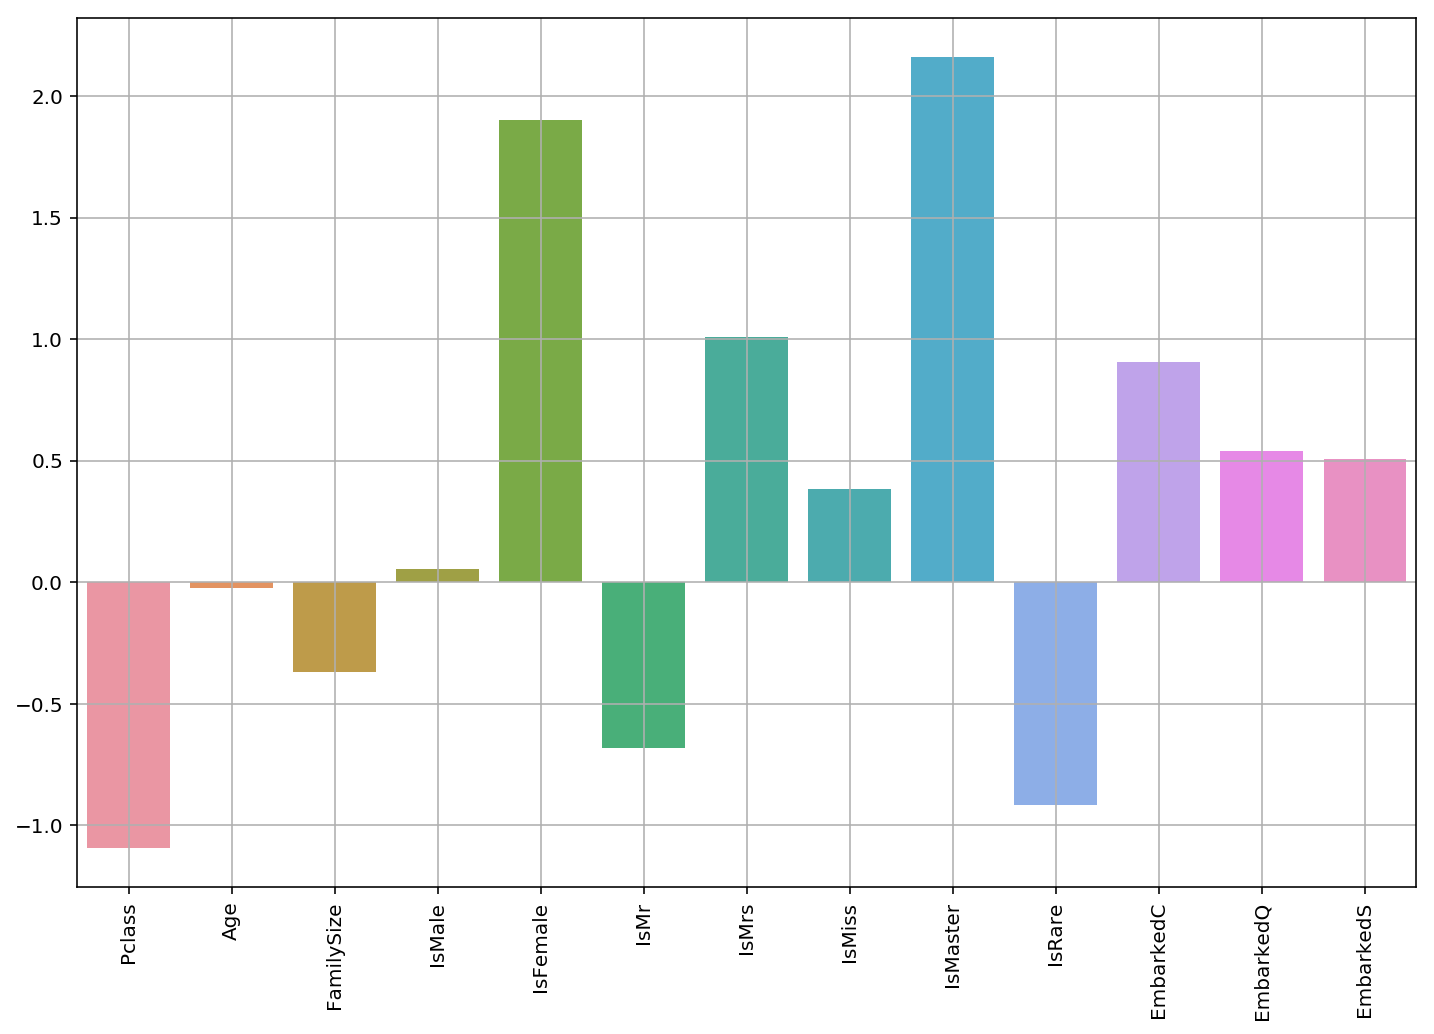

In [146]:
logistic_regression_features(X, model)

In [147]:
data['Class1'] = (data.Pclass == 1).astype(float)
data['Class2'] = (data.Pclass == 2).astype(float)
data['Class3'] = (data.Pclass == 3).astype(float)
data = data.drop('Pclass', axis=1)
data.head()

,Survived,Age,FamilySize,IsMale,IsFemale,IsMr,IsMrs,IsMiss,IsMaster,IsRare,EmbarkedC,EmbarkedQ,EmbarkedS,Class1,Class2,Class3
PassengerId,,,,,,,,,,,,,,,,
1,0,22.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1,38.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,26.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1,35.0,2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0,35.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [148]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.839820359281
test score:  0.811659192825


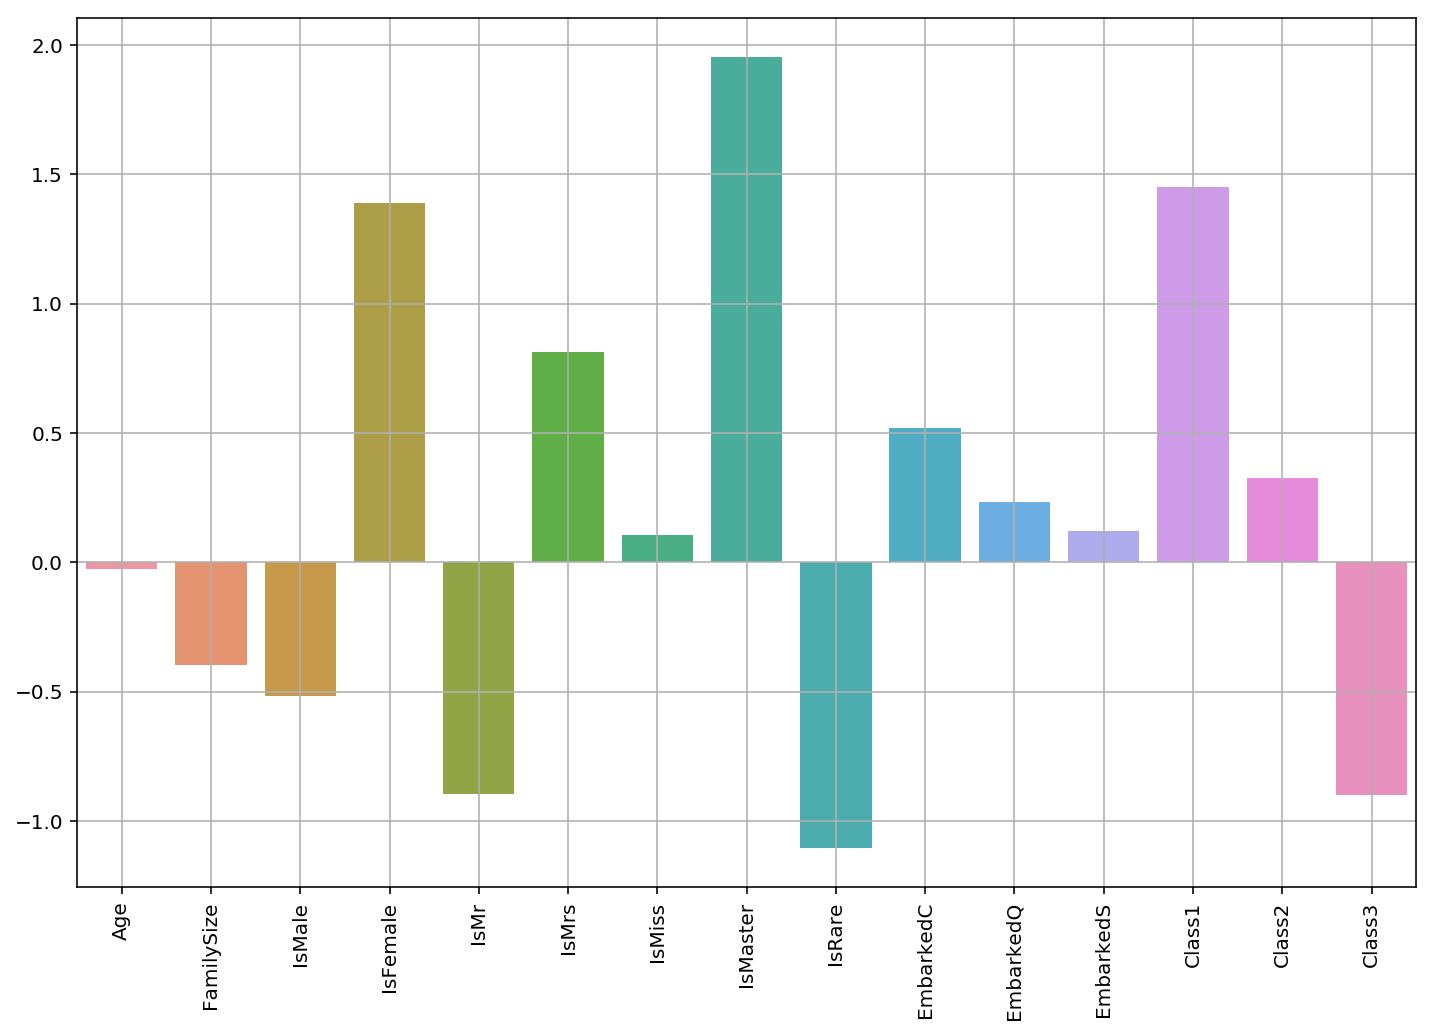

In [151]:
logistic_regression_features(X, model)

In [152]:
data['IsChild'] = (data.Age < 18).astype(float)
data['IsAdult'] = (18 <= data.Age).astype(float)

data = data.drop('Age', axis=1)

In [153]:
X = data.drop('Survived', axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

model = LogisticRegression()
model.fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score: ", model.score(X_test, y_test))

train score: 0.841317365269
test score:  0.816143497758


In [154]:
for c in [0.001, 0.003, 0.006, 0.1, 0.3, 0.6, 1.0, 3.0, 6.0]:
    model = LogisticRegression(C=c)
    model.fit(X_train, y_train)
    
    print("C={:f} train: {:f} test: {:f}".format(c, model.score(X_train, y_train), model.score(X_test, y_test)))

C=0.001000 train: 0.642216 test: 0.641256
C=0.003000 train: 0.791916 test: 0.766816
C=0.006000 train: 0.817365 test: 0.811659
C=0.100000 train: 0.826347 test: 0.807175
C=0.300000 train: 0.836826 test: 0.811659
C=0.600000 train: 0.841317 test: 0.816143
C=1.000000 train: 0.841317 test: 0.816143
C=3.000000 train: 0.835329 test: 0.807175
C=6.000000 train: 0.835329 test: 0.807175
